<html>
<body>


<H1><U><font color="blue">Task 1 : Exploratory Data Analysis</font></U></H1><BR>

<font color="red"><h3><b>
Code Contributor: Aboli Marathe<BR>
Organisation:     PISB<BR>
Event:            Datawiz 2020<BR></h3></b>
</font>


</body>
</html>

<B>I have simply done an exploratory data analysis, nothing much on the statistical side. Note the libraries used, encoding of categorical variables and intuitive additions, like the grade marking :) </B>

In [ ]:
#Importing the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing 
import matplotlib.gridspec as gridspec 
import matplotlib as mpl
import re
import os
from matplotlib import cm
from collections import OrderedDict
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
import glob
import moviepy.editor as mpy
import plotly.offline as py 
import plotly.graph_objs as go
from plotly import tools
py.init_notebook_mode(connected=True)
import plotly.express as px
sns.set(style="ticks")
print(f"Matplotlib Version : {mpl.__version__}")
print(f"Seaborn Version : {sns.__version__}")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Matplotlib Version : 3.2.2
Seaborn Version : 0.10.1


<font color = "Blue"><B><h2>Loading the data, and observing the features, datatypes and shape</h2></B></font>

In [ ]:
df = pd.read_csv("Practice.csv")

In [ ]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [ ]:
df["gender"].value_counts()

female    518
male      482
Name: gender, dtype: int64

<font color = "Red"><B><h3> Nearly un biased gender representation</h3></B></font>

In [ ]:
df.shape

(1000, 8)

<font color = "Blue"><B><h2>Checking out the different colours that Python offers us to make the visualization pretty</h2></B></font>

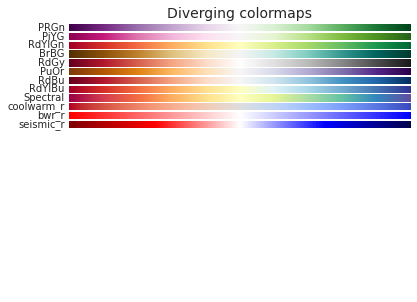

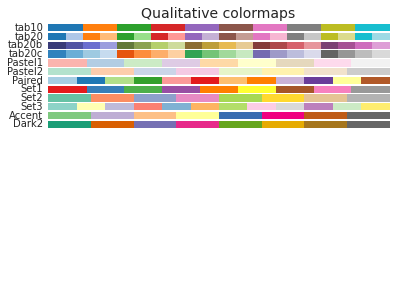

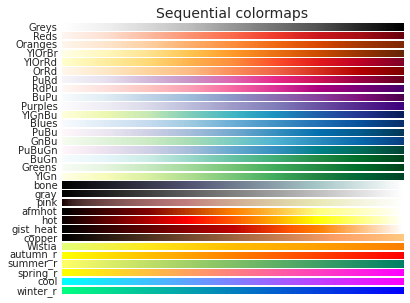

In [ ]:
cmaps = OrderedDict()

cmaps['Diverging']= ['PRGn', 'PiYG', 'RdYlGn', 'BrBG', 'RdGy', 'PuOr', 'RdBu', 'RdYlBu',  'Spectral', 'coolwarm_r', 'bwr_r', 'seismic_r']
cmaps['Qualitative'] = ['tab10', 'tab20', 'tab20b', 'tab20c','Pastel1', 'Pastel2', 'Paired','Set1', 'Set2', 'Set3', 'Accent', 'Dark2' ]
cmaps['Sequential'] = ['Greys', 'Reds', 'Oranges','YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu', 'Purples', 'YlGnBu', 'Blues', 'PuBu', 'GnBu', 'PuBuGn', 'BuGn',  'Greens', 'YlGn','bone', 'gray', 'pink', 'afmhot', 'hot', 'gist_heat', 'copper', 'Wistia', 'autumn_r', 'summer_r', 'spring_r', 'cool', 'winter_r']
nrows = max(len(cmap_list) for cmap_category, cmap_list in cmaps.items())
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(cmap_category, cmap_list, nrows):
    fig, axes = plt.subplots(nrows=nrows)
    fig.subplots_adjust(top=0.95, bottom=0.01, left=0.2, right=0.99)
    axes[0].set_title(cmap_category + ' colormaps', fontsize=14)

    for ax, name in zip(axes, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(name))
        pos = list(ax.get_position().bounds)
        x_text = pos[0] - 0.01
        y_text = pos[1] + pos[3]/2.
        fig.text(x_text, y_text, name, va='center', ha='right', fontsize=10)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axes:
        ax.set_axis_off()


for cmap_category, cmap_list in cmaps.items():
    plot_color_gradients(cmap_category, cmap_list, nrows)

plt.show()


<font color = "Blue"><B><h2> Basic Frequency Distribution of Scores</h2></B></font>

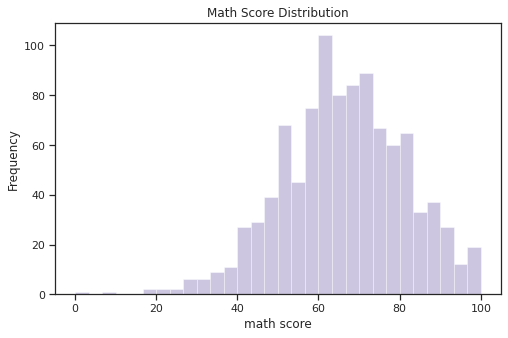

In [ ]:
plt.figure(figsize=(8,5))
sns.distplot(df['math score'], kde = False, color='m', bins = 30)
plt.ylabel('Frequency')
plt.title('Math Score Distribution')
plt.show()

<font color = "Red"><B><h3> Most students got 60 marks in Mathematics</h3></B></font>

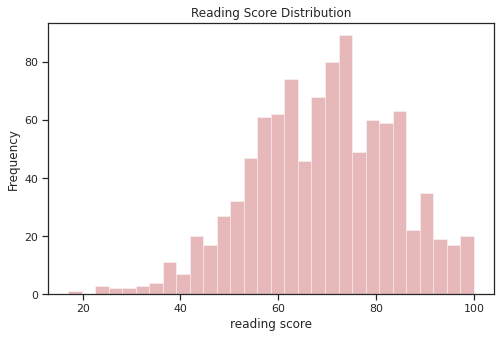

In [ ]:
plt.figure(figsize=(8,5))
sns.distplot(df['reading score'], kde = False, color='r', bins = 30)
plt.ylabel('Frequency')
plt.title('Reading Score Distribution')
plt.show()

<font color = "Red"><B><h3> Most students got 75 marks in Reading</h3></B></font>

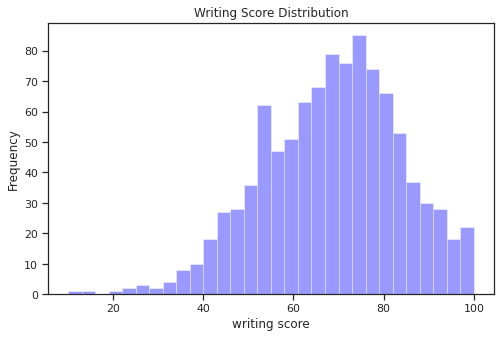

In [ ]:
plt.figure(figsize=(8,5))
sns.distplot(df['writing score'], kde = False, color='blue', bins = 30)
plt.ylabel('Frequency')
plt.title('Writing Score Distribution')
plt.show()

<font color = "Red"><B><h3> Most students got 75 marks in Writing</h3></B></font>

<font color = "Blue"><B><h2> Encoding the variables that appear as strings</h2></B></font>

In [ ]:
df['gender_encoded'] = 0
df['race/ethnicity_encoded'] = 0
df['lunch_encoded'] = 0
df['test preparation course_encoded'] = 0
df['parental level of education_encoded'] = 0

df['gender_encoded'].loc[df['gender'] == 'male'] = 1
df['gender_encoded'].loc[df['gender'] == 'female'] = 0
df['race/ethnicity_encoded'].loc[df['race/ethnicity'] == 'group A'] = 1
df['race/ethnicity_encoded'].loc[df['race/ethnicity'] == 'group B'] = 2
df['race/ethnicity_encoded'].loc[df['race/ethnicity'] == 'group C'] = 3
df['race/ethnicity_encoded'].loc[df['race/ethnicity'] == 'group D'] = 4
df['race/ethnicity_encoded'].loc[df['race/ethnicity'] == 'group E'] = 5
df['lunch_encoded'] = df['lunch'].replace({'standard':1,'free/reduced':0})
df['test preparation course_encoded'].loc[df['test preparation course'] == 'none'] = 0
df['test preparation course_encoded'].loc[df['test preparation course'] == 'completed'] = 1
df['parental level of education_encoded'].loc[df['parental level of education'] == 'some high school'] = 1
df['parental level of education_encoded'].loc[df['parental level of education'] == 'high school'] = 2
df['parental level of education_encoded'].loc[df['parental level of education'] == 'associate\'s degree'] = 3
df['parental level of education_encoded'].loc[df['parental level of education'] == 'some college'] = 4
df['parental level of education_encoded'].loc[df['parental level of education'] == 'bachelor\'s degree'] = 5
df['parental level of education_encoded'].loc[df['parental level of education'] == 'master\'s degree'] = 6



<font color = "Blue"><B><h2> Oh let's see how hot the encoded values are ;)</h2></B></font>

In [ ]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,gender_encoded,race/ethnicity_encoded,lunch_encoded,test preparation course_encoded,parental level of education_encoded
0,female,group B,bachelor's degree,standard,none,72,72,74,0,2,1,0,5
1,female,group C,some college,standard,completed,69,90,88,0,3,1,1,4
2,female,group B,master's degree,standard,none,90,95,93,0,2,1,0,6
3,male,group A,associate's degree,free/reduced,none,47,57,44,1,1,0,0,3
4,male,group C,some college,standard,none,76,78,75,1,3,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,0,5,1,1,6
996,male,group C,high school,free/reduced,none,62,55,55,1,3,0,0,2
997,female,group C,high school,free/reduced,completed,59,71,65,0,3,0,1,2
998,female,group D,some college,standard,completed,68,78,77,0,4,1,1,4


<font color = "Blue"><B><h2> Pearson correlation of features with Gender</h2></B></font>

In [ ]:
for i in df.columns[9:]:
  x = df[i].corr(df['gender_encoded'])
  print("\n Correlation of gender with " + str(i)  + "  :  " + str(x))


 Correlation of gender with race/ethnicity_encoded  :  -0.0015019243791520073

 Correlation of gender with lunch_encoded  :  0.021371670377777468

 Correlation of gender with test preparation course_encoded  :  0.00602795174286004

 Correlation of gender with parental level of education_encoded  :  -0.04380058651907008


<font color = "Red"><B><h3> It looks like overall there is no strong relation between the gender and test preparation, lunch or PLOE, which is pretty obvious</h3></B></font>

<font color = "Blue"><B><h2> Rudimentary Scatter Plots to observe values</h2></B></font>


 Scatter plot of gender with race/ethnicity_encoded  :  -0.04380058651907008


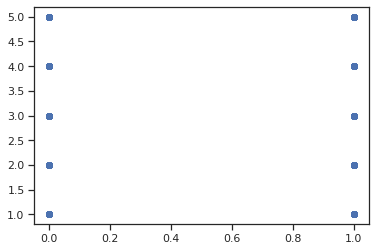


 Scatter plot of gender with lunch_encoded  :  -0.04380058651907008


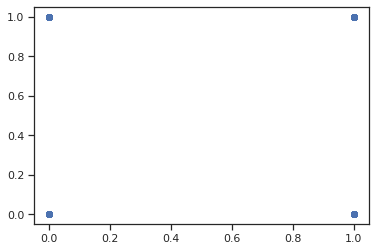


 Scatter plot of gender with test preparation course_encoded  :  -0.04380058651907008


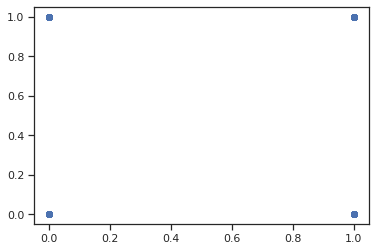


 Scatter plot of gender with parental level of education_encoded  :  -0.04380058651907008


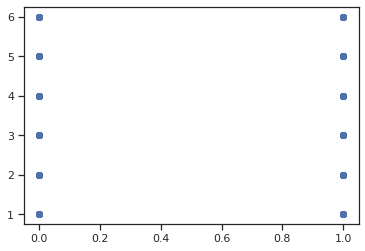

In [ ]:
for i in df.columns[9:]:
  print("\n Scatter plot of gender with " + str(i)  + "  :  " + str(x))
  plt.scatter(df['gender_encoded'],df[i])
  plt.show()

<font color = "Red"><B><h3> Discrete values as expected</h3></B></font>

<font color = "Blue"><B><h2> Correlation Heatmap</h2></B></font>

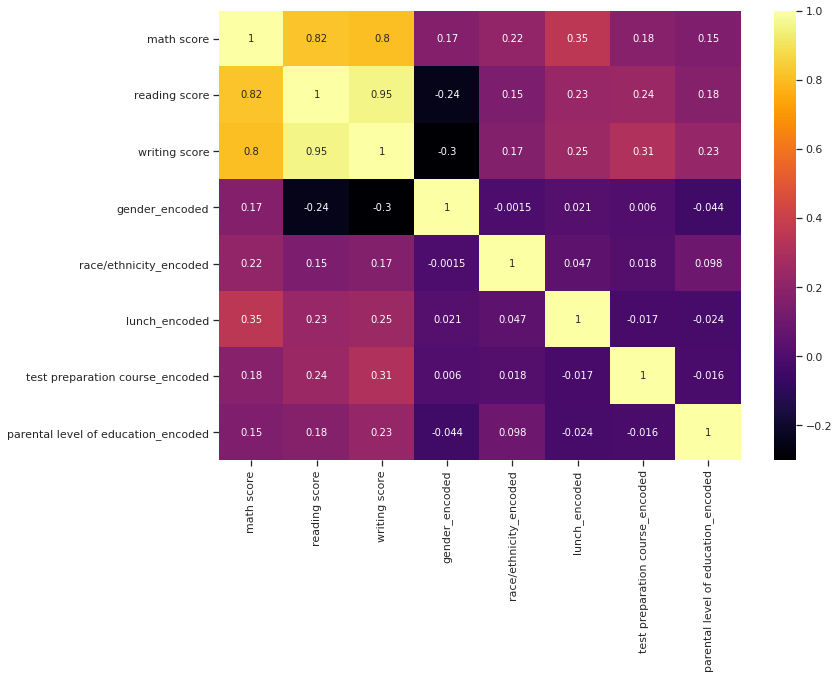

In [ ]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(df.corr(), annot = True, cmap='inferno',ax = ax)
plt.show()

<font color = "Red"><B><h3> Students who are good at reading are also good at writing</h3></B></font>

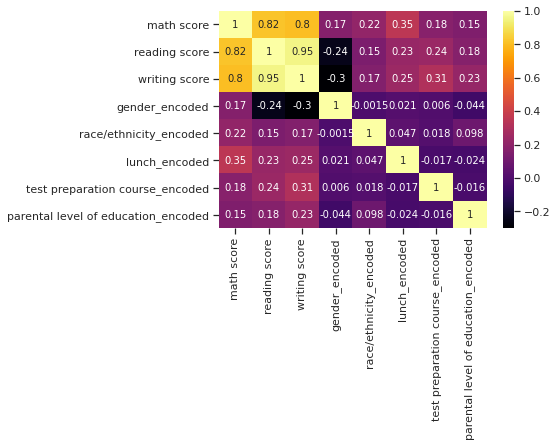

In [ ]:
sns.heatmap(df.corr(), annot = True, cmap='inferno')
plt.show()

<font color = "Red"><B><h3> Good relation between reading and writing skills</h3></B></font>

<font color = "Blue"><B><h2> Score Representation with Gender</h2></B></font>

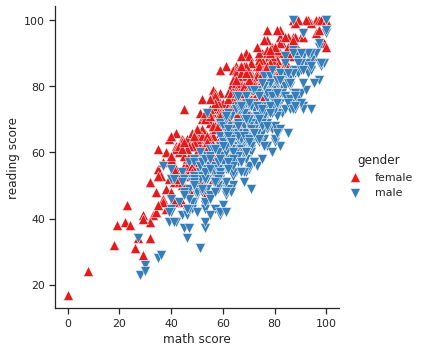

In [ ]:
g = sns.FacetGrid(df, hue="gender", palette="Set1", height=5, hue_kws={"marker": ["^", "v"]})
g.map(plt.scatter, "math score", "reading score", s=100, linewidth=.5, edgecolor="white")
g.add_legend();

<font color = "Red"><B><h3> Similar positive trend over both genders</h3></B></font>

No handles with labels found to put in legend.


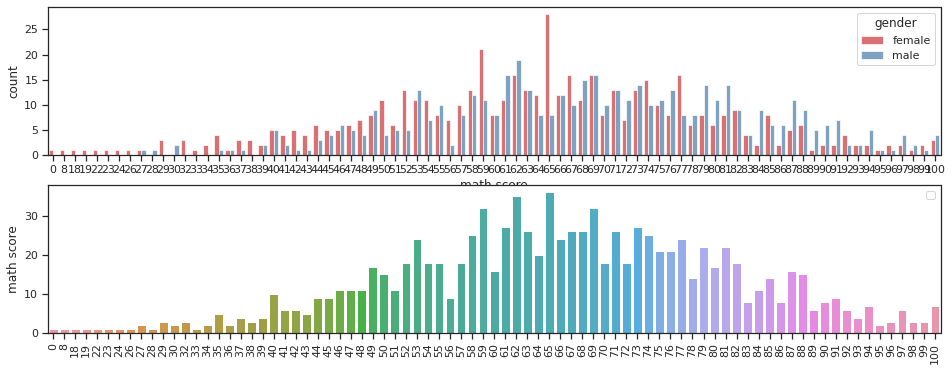

In [ ]:
fig, ax = plt.subplots(2,1,figsize=(16, 6))
# type 1 : use hue parameter
sns.countplot(x='math score', data=df, hue='gender', palette='Set1', alpha=0.7, ax=ax[0])
plt.legend()
plt.xticks(rotation='vertical')

#type 2: use value_counts + barplot / hard to divide like hue 
sns.barplot(x=df['math score'].value_counts().index, y=df['math score'].value_counts(), ax=ax[1])
plt.show()

<font color = "Red"><B><h3> Most students have average marks, few students are failing</h3></B></font>

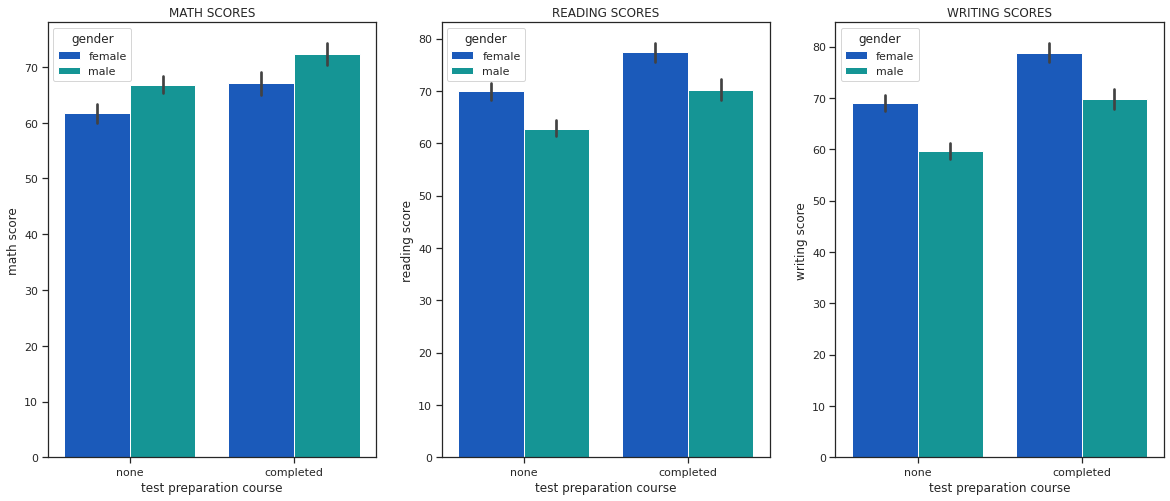

In [ ]:
plt.figure(figsize=(20,8))
plt.subplot(1, 3, 1)
sns.barplot(x='test preparation course',y='math score',data=df,hue='gender',palette='winter')
plt.title('MATH SCORES')
plt.subplot(1, 3, 2)
sns.barplot(x='test preparation course',y='reading score',data=df,hue='gender',palette='winter')
plt.title('READING SCORES')
plt.subplot(1, 3, 3)
sns.barplot(x='test preparation course',y='writing score',data=df,hue='gender',palette='winter')
plt.title('WRITING SCORES')
plt.show()

<font color = "Red"><B><h3> As predicted, the more that students prepared for the tests, the better they performed</h3></B></font>

<font color = "Blue"><B><h2> Converting Scores to Grades</h2></B></font>

In [ ]:
# Function to assign grades

def get_grade(marks):
    if marks >= 91:
        return 'O'
    elif marks >= 82 and marks < 91:
        return 'A+'
    elif marks >=73 and marks < 82:
        return 'A'
    elif marks >=64 and marks < 73:
        return 'B+'
    elif marks >= 55 and marks < 64:
        return 'B'
    elif marks >=46 and marks < 55:
        return 'C'
    elif marks >= 35 and marks < 46:
        return 'P'
    elif marks < 35:
        return 'F'
df['reading_grade'] = df['reading score'].apply(get_grade)
df['writing_grade'] = df['writing score'].apply(get_grade)
df['math_grade'] = df['math score'].apply(get_grade)

In [ ]:
minimum_math = df['math_grade'] == 'F'
minimum_reading = df['reading_grade'] == 'F'
minimum_writing = df['writing_grade'] == 'F'



minimum_grade = df[(minimum_math) & (minimum_reading) & (minimum_writing)]
print('Number of students having minimum grade(F) in all three subjects: ',len(minimum_grade))
#Failed Students
failed_students = df[(minimum_math) | (minimum_reading)|(minimum_writing)]
failed = len(failed_students)
print('Total Number of students who failed are: {}' .format(len(failed_students)))

#Passed Students
passed_students = len(df) - len(failed_students)
print('Total Number of students who passed are: {}' .format(passed_students))

Number of students having minimum grade(F) in all three subjects:  8
Total Number of students who failed are: 29
Total Number of students who passed are: 971


<font color = "Blue"><B><h2> Grade Frequency Plots</h2></B></font>

Text(0.5, 1.0, 'Grade Count in Writing')

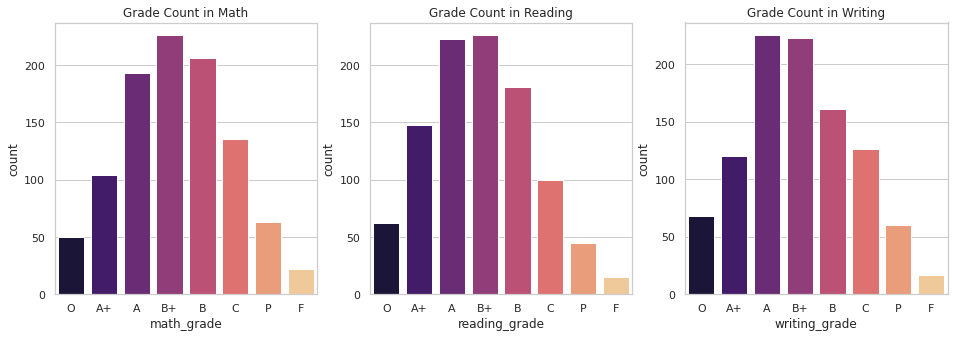

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
sns.countplot(x ='math_grade', data = df,order = ['O','A+','A','B+','B','C','P','F'],palette='magma')
plt.title('Grade Count in Math')


plt.subplot(1,3,2)
sns.countplot(x ='reading_grade', data = df,order = ['O','A+','A','B+','B','C','P','F'],palette='magma')
plt.title('Grade Count in Reading')

plt.subplot(1,3,3)
sns.countplot(x ='writing_grade', data = df,order = ['O','A+','A','B+','B','C','P','F'],palette='magma')
plt.title('Grade Count in Writing')

<font color = "Red"><B><h3> Most students got B+ grade overall</h3></B></font>

<font color = "Blue"><B><h2> Score Representation with Parental Level of Education</h2></B></font>

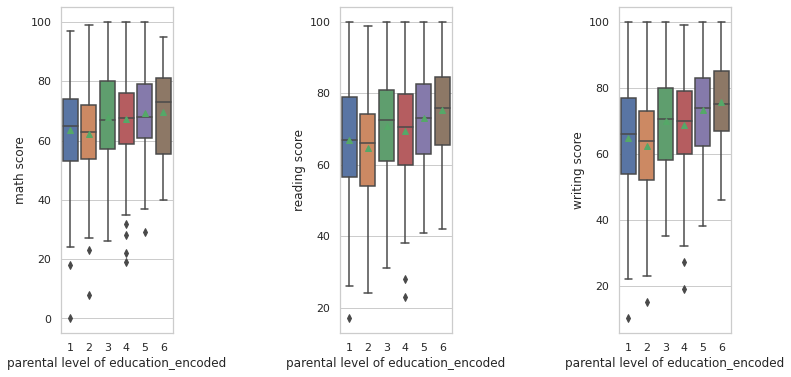

In [ ]:
fig, axs = plt.subplots(ncols=3,figsize=(12,6))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=1.5, hspace=None);
sns.boxplot(x="parental level of education_encoded", y="math score", data=df, ax=axs[0],showmeans=True);
sns.boxplot(x="parental level of education_encoded", y="reading score", data=df, ax=axs[1],showmeans=True);
sns.boxplot(x="parental level of education_encoded", y="writing score", data=df, ax=axs[2],showmeans=True);

<font color = "Red"><B><h3> Regular trends, but finding some outliers</h3></B></font>

<font color = "Blue"><B><h2> Violin Representation of Scores</h2></B></font>

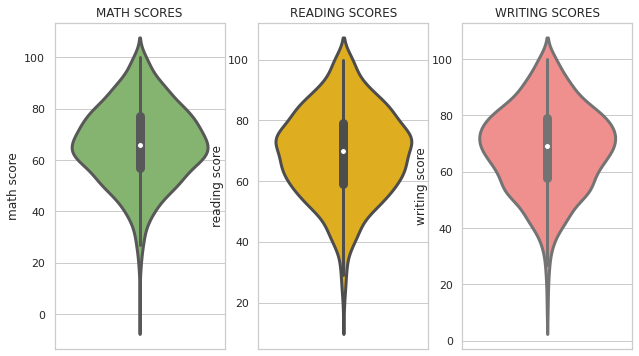

In [ ]:
plt.figure(figsize=(14,6))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,palette='summer',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,palette='Wistia_r',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,palette='spring',linewidth=3)
plt.show()

<font color = "Red"><B><h3> Few few students failed, mostly are in the 60-70 range</h3></B></font>

<font color = "Blue"><B><h2> Histogram Representation of Scores with Gender</h2></B></font>

In [ ]:
#type 1 : Stacked graph (default)

fig = px.histogram(df, x="math score", y="math score", color="gender")
fig.show()

#type 2 : group

fig = px.histogram(df, x="math score", y="math score", color="gender")
fig.update_layout(barmode='group')
fig.show()

<font color = "Red"><B><h3> Looks like the male students did better overall than female in math</h3></B></font>

<font color = "Blue"><B><h2> Score Representation with Parental Level of Education and Gender</h2></B></font>

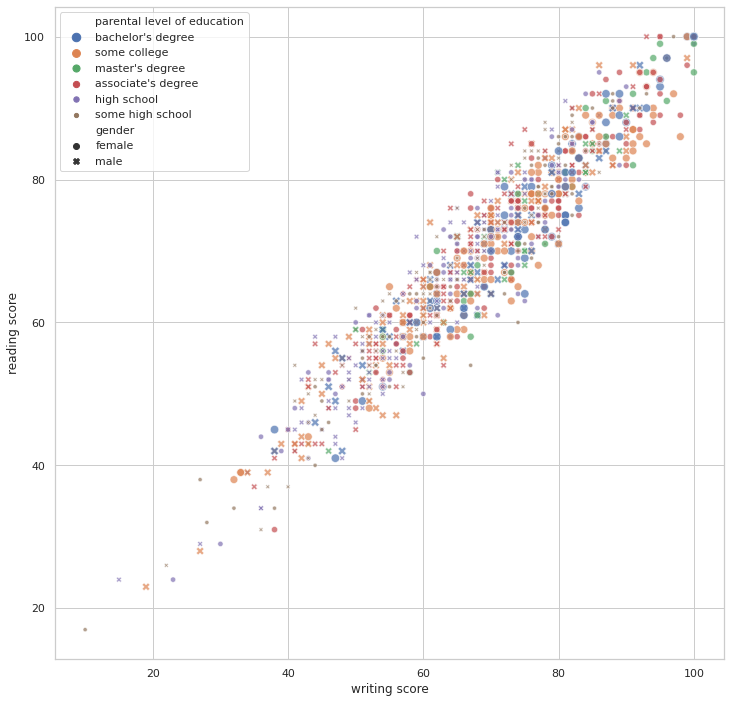

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
sns.scatterplot(data=df, x='writing score', y='reading score', style='gender',hue='parental level of education',size='parental level of education', alpha=0.7)
plt.show()

<font color = "Blue"><B><h2> Score Representation with Parental Level of Education</h2></B></font>

In [ ]:
fig = px.scatter(df, x='writing score', y='reading score', color='parental level of education', opacity=0.5)
fig.show()

<font color = "Blue"><B><h2> Score Representation with Parental Level of Education</h2></B></font>

In [ ]:

# type 3 : with size & color 
fig = px.scatter(df, x='writing score', y='reading score', 
                 color='parental level of education_encoded',
                 size='parental level of education_encoded',
                )
fig.show()

<font color = "Blue"><B><h2> Box plot Score Representation with P.L.O.E.</h2></B></font>

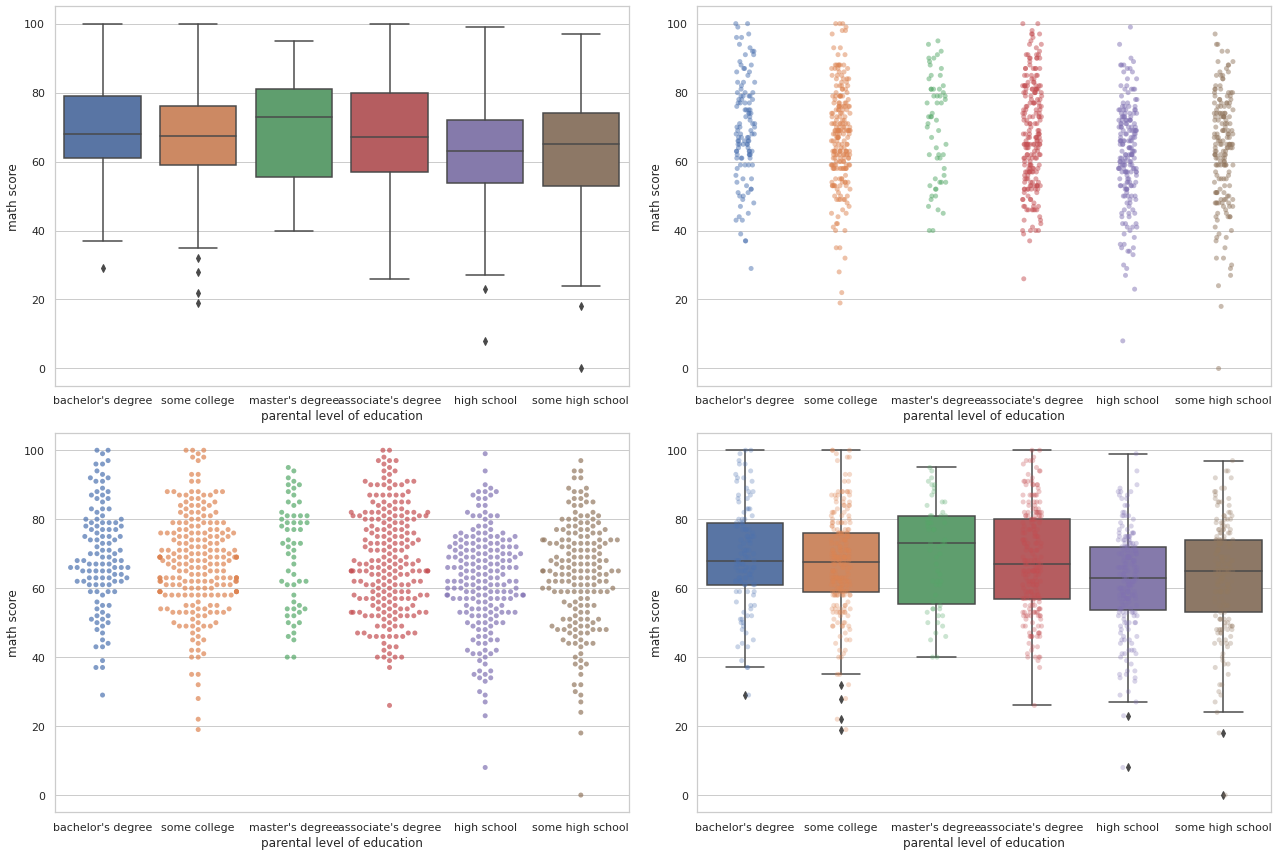

In [ ]:
# type 1 : default boxplot & stripplot

fig, ax = plt.subplots(2, 2, figsize=(18, 12))

# boxplot
sns.boxplot(x='parental level of education', y='math score', data=df, ax=ax[0][0])

# stripplot
sns.stripplot(x='parental level of education', y='math score', data=df, ax=ax[0][1], alpha=0.5)

# swarmplot 
sns.swarmplot(x='parental level of education', y='math score', data=df, ax=ax[1][0], alpha=0.7)

# both
sns.boxplot(x='parental level of education', y='math score', data=df, ax=ax[1][1])
sns.stripplot(x='parental level of education', y='math score', data=df, ax=ax[1][1], alpha=0.3)

plt.tight_layout()
plt.show()

<font color = "Blue"><B><h2> Mixed Representation of features</h2></B></font>

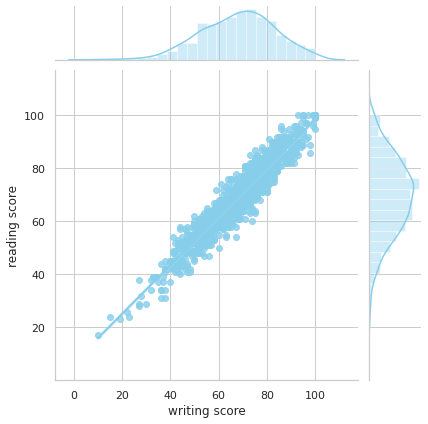

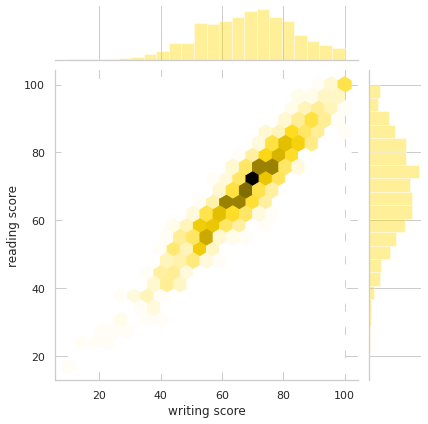

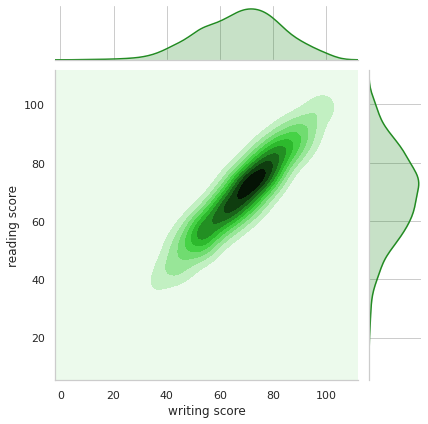

In [ ]:
# type 2 : many types (reg, hex, kde)
sns.jointplot(data=df, x='writing score', y='reading score', kind='reg', color='skyblue')
sns.jointplot(data=df, x='writing score', y='reading score', kind='hex', color='gold')
sns.jointplot(data=df, x='writing score', y='reading score', kind='kde', color='forestgreen' )
plt.show()

<font color = "Blue"><B><h2> Score Visualization</h2></B></font>

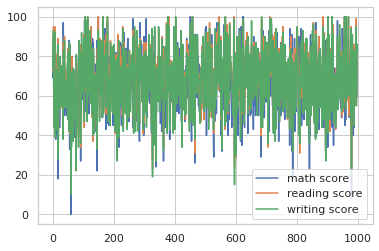

In [ ]:
data6=df.loc[:,["math score","reading score","writing score"]]
data6.plot()

<font color = "Blue"><B><h2> Fun Pair Plots over Gender</h2></B></font>

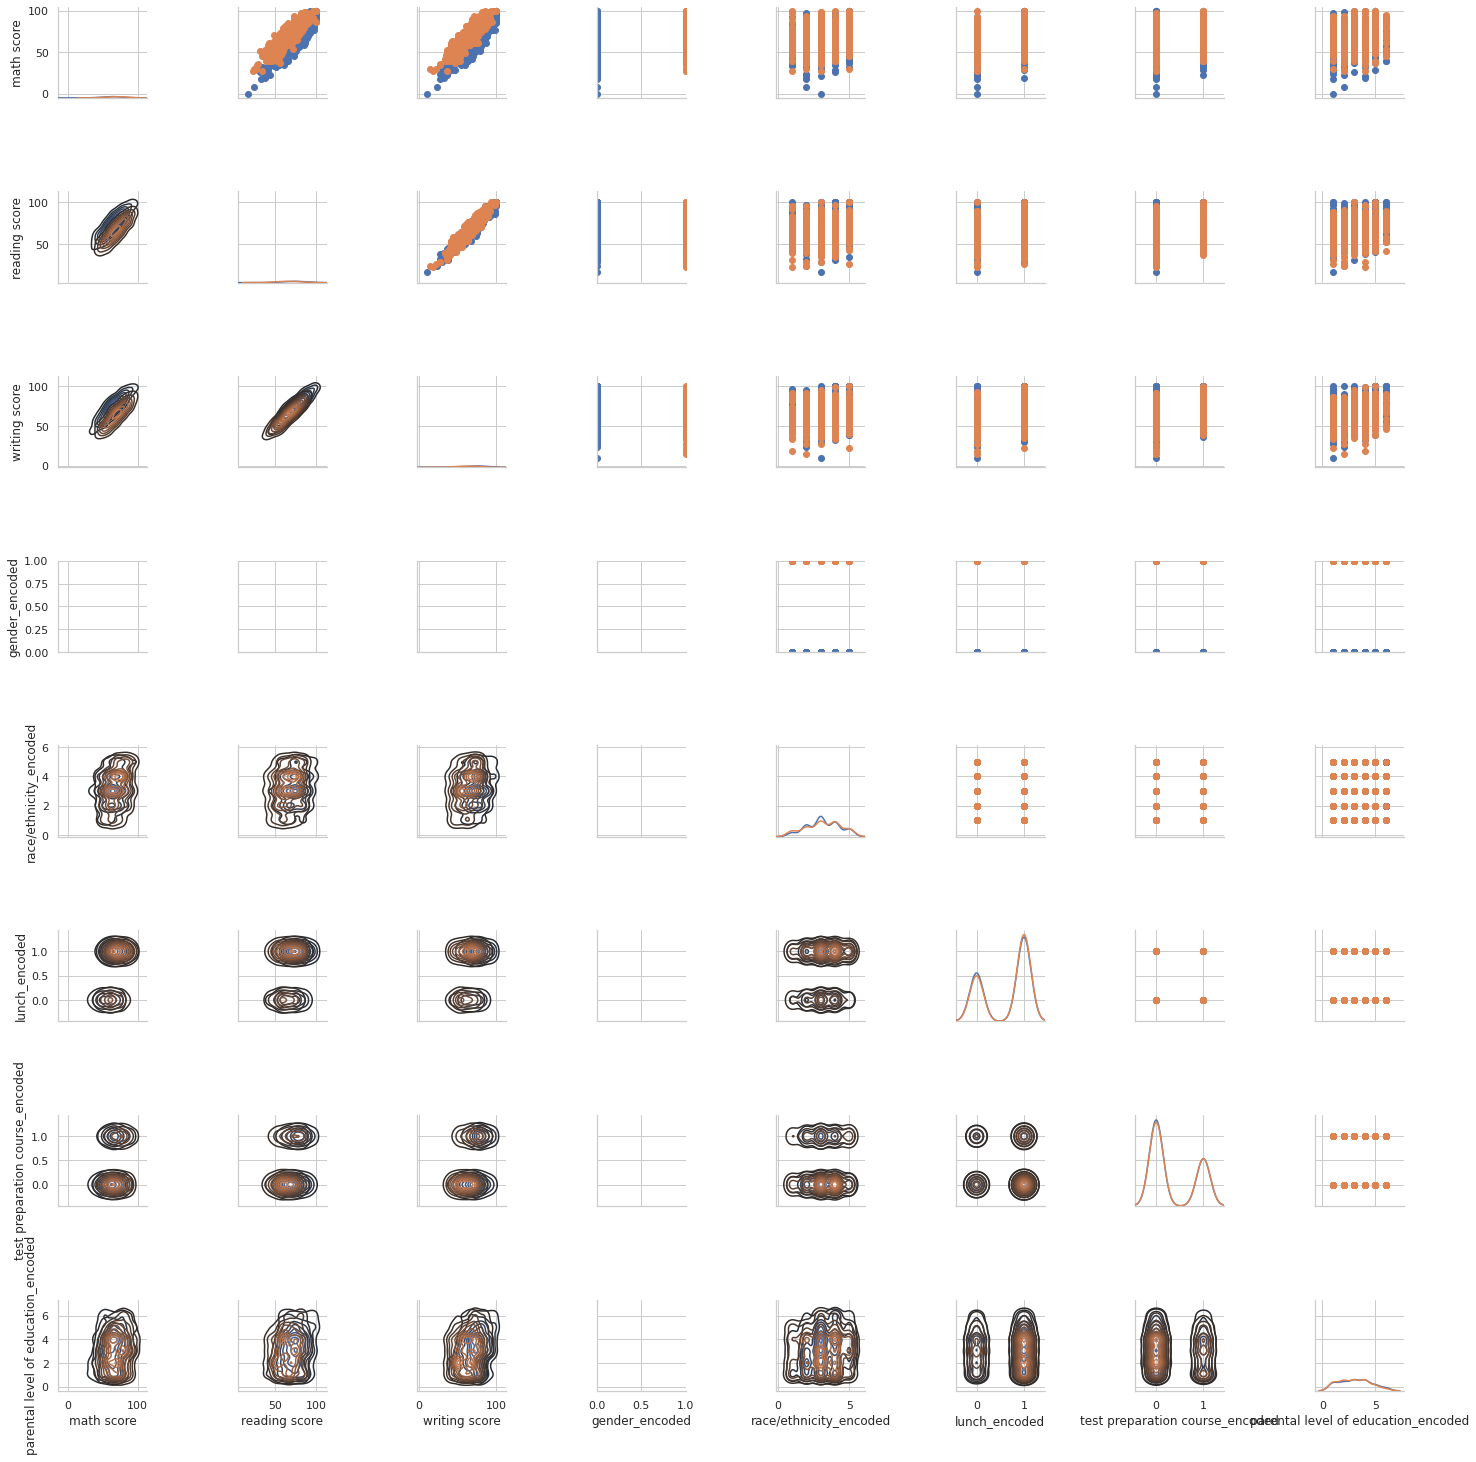

In [ ]:
g = sns.PairGrid(df, hue='gender')
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot)
g.map_lower(sns.kdeplot, shadow=True)
plt.show()

<font color = "Blue"><B><h2> Grade Representation</h2></B></font>

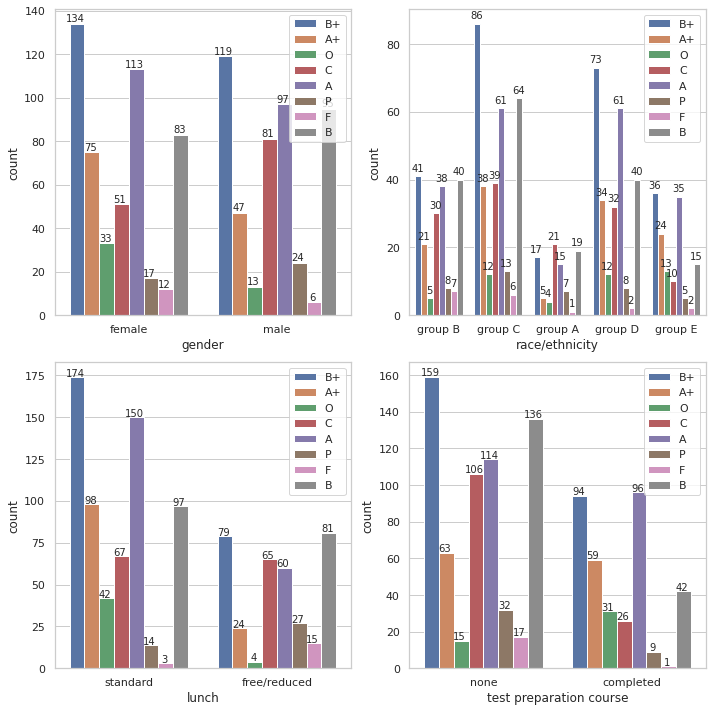

In [ ]:
#For annotations
def annot(ax, h):
    for p in ax.patches:
        plt.text(p.get_x()+0.4*p.get_width(), h+p.get_height(), "{:1.0f}".format(p.get_height()), ha="center", va="center")


df['Percentage'] = df['math score'] + df['reading score'] + df['writing score']
df['Percentage'] = df['Percentage'] / 3
df['Grade'] = df['Percentage'].apply(get_grade)

columns = ["gender", "race/ethnicity", "lunch", "test preparation course"]

plt.figure(figsize=(10,10))
subplot = 1
for col in columns:
    plt.subplot(2,2,subplot)
    ax = sns.countplot(x=col, hue="Grade", data=df)
    annot(ax, 2.3)
    subplot += 1
    plt.legend(loc="upper right")
plt.tight_layout()

<font color = "Blue"><B><h2> Dynamic Visualization: Making Videos :)</h2></B></font>

In [ ]:
df['id'] = df.index
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,gender_encoded,race/ethnicity_encoded,lunch_encoded,test preparation course_encoded,parental level of education_encoded,reading_grade,writing_grade,math_grade,Percentage,Grade,id
0,female,group B,bachelor's degree,standard,none,72,72,74,0,2,1,0,5,B+,A,B+,72.666667,B+,0
1,female,group C,some college,standard,completed,69,90,88,0,3,1,1,4,A+,A+,B+,82.333333,A+,1
2,female,group B,master's degree,standard,none,90,95,93,0,2,1,0,6,O,O,A+,92.666667,O,2
3,male,group A,associate's degree,free/reduced,none,47,57,44,1,1,0,0,3,B,P,C,49.333333,C,3
4,male,group C,some college,standard,none,76,78,75,1,3,1,0,4,A,A,A,76.333333,A,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,0,5,1,1,6,O,O,A+,94.000000,O,995
996,male,group C,high school,free/reduced,none,62,55,55,1,3,0,0,2,B,B,B,57.333333,B,996
997,female,group C,high school,free/reduced,completed,59,71,65,0,3,0,1,2,B+,B+,B,65.000000,B+,997
998,female,group D,some college,standard,completed,68,78,77,0,4,1,1,4,A,A,B+,74.333333,A,998


FileNotFoundError: ignored

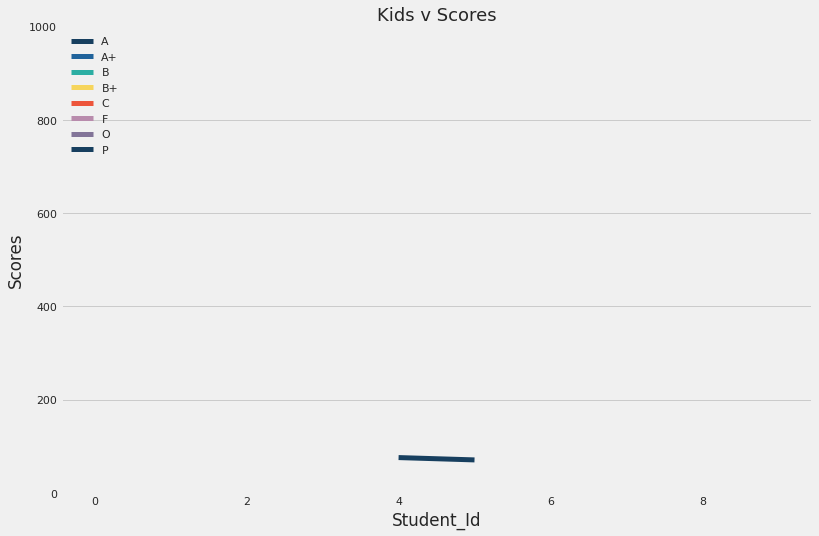

In [ ]:


df1 = df.pivot(index = 'id', columns = 'Grade', values = 'math score')

# Section 6 - Preparing out Dataset for Graphing
df1 = df1.reset_index()
df1 = df1.reset_index(drop=True)
df1 = df1.drop(columns = 'id')
df1 = df1.head(300)


plt.style.use('fivethirtyeight')
length = len(df1.index)
for i in range(10,length+10):
    ax = df1.iloc[:i].plot(figsize=(12,8), linewidth=5, color = ['#173F5F', '#20639B', '#2CAEA3', '#F6D55C', '#ED553B', '#B88BAC', '#827498'])
    ax.set_ylim(0, 1000)
    ax.set_xlabel('Student_Id')
    ax.set_ylabel('Scores')
    ax.set_title("Kids v Scores", fontsize = 18)
    ax.legend(loc='upper left', frameon=False)
    ax.grid(axis='x')
    fig = ax.get_figure()
    fig.savefig(f"sample_data/pngs/{i}.png")
    

gif_name = 'EDA.gif'
fps = 6
file_list = glob.glob('sample_data/pngs/*')
clip = mpy.ImageSequenceClip(file_list, fps=fps)
clip.write_gif('EDA.gif'.format(gif_name), fps=fps)

In [ ]:
gif_name = 'Aboli.gif'
fps = 6
file_list = glob.glob('sample_data/pngs/*')
clip = mpy.ImageSequenceClip(file_list, fps=fps)
clip.write_gif('Dario.gif'.format(gif_name), fps=fps)

<font color = "Blue"><B><h2> CONCLUSION</h2></B></font><BR>
<font color = "Red"><B><h2> Hope you had fun making these plots! Although we can see some trends and form some insights, we must take into account the bias and limitations of the dataset, and hence cannot make any firm conclusions about the representation, mental ablities or background over gender, family or education. However, in our limited scope, we hope that our analysis will be helpful for the educational authorities.</h2></B></font>